In [14]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# Add one more hidden layer
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(encoding_dim, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
adam_optimizer = Adam(learning_rate=0.001)

# Compile the model with the new optimizer
autoencoder.compile(optimizer=adam_optimizer, loss='binary_crossentropy')
# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
235/235 [==============================] - 6s 16ms/step - loss: 0.4273 - val_loss: 0.3533
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.3354 - val_loss: 0.3255
Epoch 3/50
235/235 [==============================] - 3s 13ms/step - loss: 0.3173 - val_loss: 0.3143
Epoch 4/50
235/235 [==============================] - 3s 13ms/step - loss: 0.3094 - val_loss: 0.3092
Epoch 5/50
235/235 [==============================] - 3s 13ms/step - loss: 0.3059 - val_loss: 0.3070
Epoch 6/50
235/235 [==============================] - 3s 13ms/step - loss: 0.3039 - val_loss: 0.3052
Epoch 7/50
235/235 [==============================] - 3s 13ms/step - loss: 0.3024 - val_loss: 0.3038
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 0.3011 - val_loss: 0.3027
Epoch 9/50
235/235 [==============================] - 3s 13ms/step - loss: 0.3000 - val_loss: 0.3016
Epoch 10/50
235/235 [==============================] - 3s 13ms/step - loss: 0.2991 - val_lo

313/313 [==============================] - 1s 3ms/step


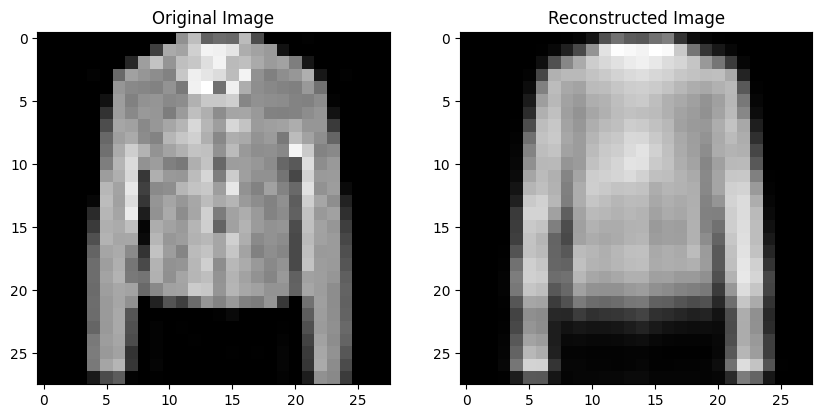

In [15]:
# Predict on test data
decoded_imgs = autoencoder.predict(x_test)

# Visualize reconstructed image and original image
import matplotlib.pyplot as plt

idx = 10
test_img = x_test[idx].reshape(28, 28)
reconstructed_img = decoded_imgs[idx].reshape(28, 28)

# Plot the original and reconstructed images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(test_img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img, cmap='gray')
plt.title('Reconstructed Image')
plt.show()
